In [1]:
import pandas as pd
df = pd.read_csv('games_final.csv')
df = df.drop(columns=['ID','GAME_DATE_EST','GAME_ID','SEASON','HOME_TEAM_ID','AWAY_TEAM_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HOME_W%                8602 non-null   float64
 1   HOME_PS_W%             8602 non-null   float64
 2   HOME_PS_MOV            8602 non-null   float64
 3   HOME_PS_PIE            8602 non-null   float64
 4   AWAY_W%                8602 non-null   float64
 5   AWAY_PS_W%             8602 non-null   float64
 6   AWAY_PS_MOV            8602 non-null   float64
 7   AWAY_PS_PIE            8602 non-null   float64
 8   SPREAD                 8602 non-null   float64
 9   MARGIN                 8602 non-null   float64
 10  HOME_TEAM_WINS         8602 non-null   int64  
 11  HOME_TEAM_BEAT_SPREAD  8602 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 806.6 KB


## Correlation matrix to inspect values

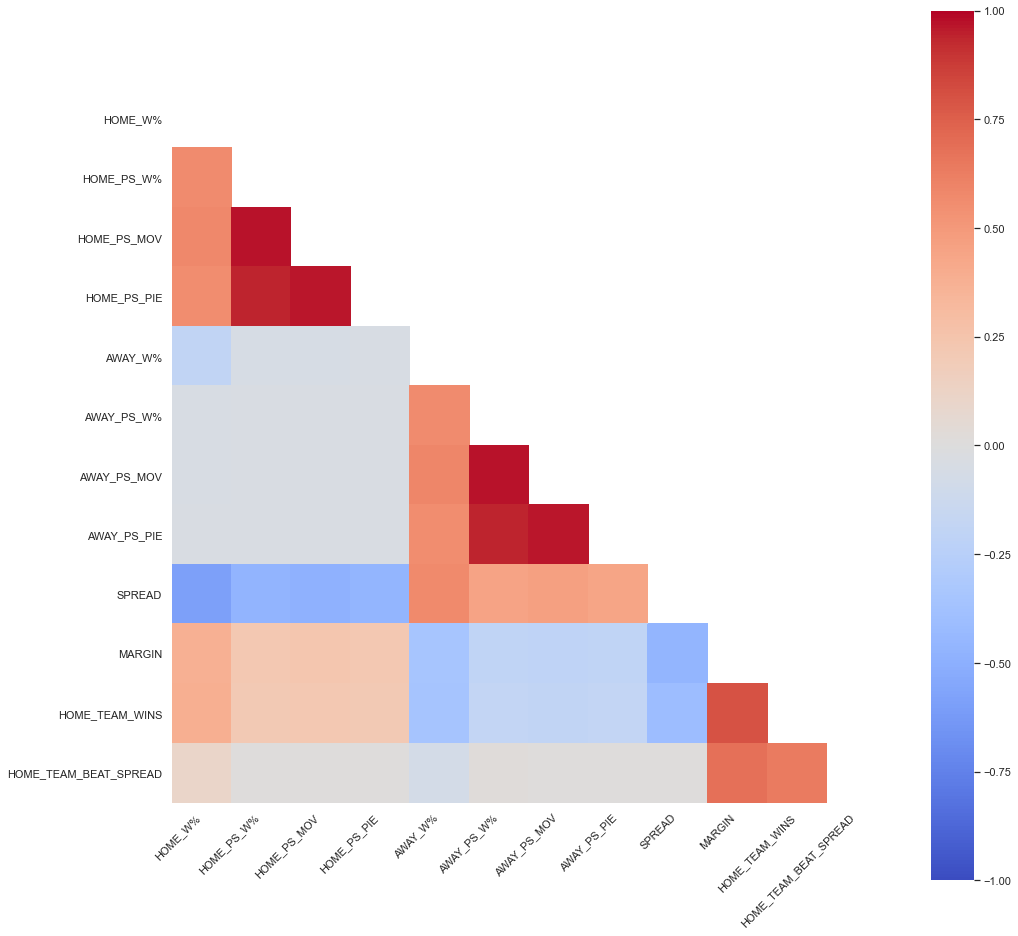

In [2]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt 

corr = df.corr()
sn.set_theme(style="white")
f, ax = plt.subplots(figsize=(16, 16))

ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    mask=np.triu(corr)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.show()

## Feature importance with decision tree classifier 
#### target = HOME_TEAM_WINS

In [3]:
# import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# drop regression target & other classification target
df_wins = df.drop(columns=['MARGIN','HOME_TEAM_BEAT_SPREAD'])

# seperate data
x = df_wins.values[:, 0:((len(df_wins.columns))-1)]
y = df_wins.values[:, ((len(df_wins.columns))-1)]

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_

In [4]:
df_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOME_W%         8602 non-null   float64
 1   HOME_PS_W%      8602 non-null   float64
 2   HOME_PS_MOV     8602 non-null   float64
 3   HOME_PS_PIE     8602 non-null   float64
 4   AWAY_W%         8602 non-null   float64
 5   AWAY_PS_W%      8602 non-null   float64
 6   AWAY_PS_MOV     8602 non-null   float64
 7   AWAY_PS_PIE     8602 non-null   float64
 8   SPREAD          8602 non-null   float64
 9   HOME_TEAM_WINS  8602 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 672.2 KB


Feature: 0, Score: 0.18015
Feature: 1, Score: 0.06143
Feature: 2, Score: 0.06374
Feature: 3, Score: 0.06284
Feature: 4, Score: 0.17679
Feature: 5, Score: 0.07118
Feature: 6, Score: 0.06266
Feature: 7, Score: 0.06724
Feature: 8, Score: 0.25397


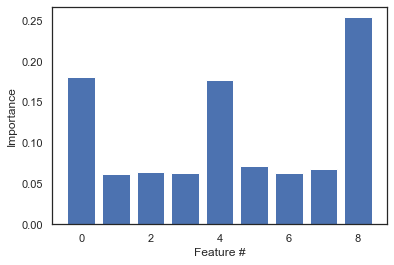

In [5]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.xlabel("Feature #")
plt.ylabel("Importance")
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Feature importance with decision tree classifier 
#### target = HOME_TEAM_BEAT_SPREAD

In [6]:
# drop regression target & other classification target
df_spread = df.drop(columns=['MARGIN','HOME_TEAM_WINS'])

# seperate data
x = df_spread.values[:, 0:((len(df_spread.columns))-1)]
y = df_spread.values[:, ((len(df_spread.columns))-1)]

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_

Feature: 0, Score: 0.17150
Feature: 1, Score: 0.07280
Feature: 2, Score: 0.09058
Feature: 3, Score: 0.08410
Feature: 4, Score: 0.17988
Feature: 5, Score: 0.07059
Feature: 6, Score: 0.08501
Feature: 7, Score: 0.08527
Feature: 8, Score: 0.16027


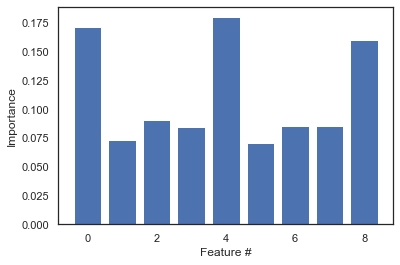

In [7]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.xlabel("Feature #")
plt.ylabel("Importance")
plt.bar([x for x in range(len(importance))], importance)
plt.show()